# HW4

## GENERALIZATION ERROR

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

### NOTES

- d<sub>vc</sub> = VC dimension, highest number of points shatterable by hypothesis set H (m<sub>H</sub>(N) = 2<sup>N</sup>
- &delta; = 4 * m<sub>H</sub>(2N) e<sup>(-N/8)&epsilon;<sup>2</sup></sup>
&rArr; ln(&delta;/4) - ln(m<sub>H</sub>(2N)) = (-N/8) * &epsilon;<sup>2</sup> 
&rArr; (8/N) * (ln (m<sub>H</sub>(2N)) - ln(&delta;/4)) = &epsilon;<sup>2</sup>
- For N &gt; d<sub>vc</sub>, use simple approximation m<sub>H</sub>(N) &asymp; N<sup>d<sub>vc</sub></sup>
&rArr; (8/N) * (ln ((2N)<sup>d<sub>vc</sub></sup>) - ln(&delta;/4)) = &epsilon;<sup>2</sup>
&rArr; (8/N) * ((d<sub>vc</sub> * ln(2N)) - ln(&delta;/4)) = &epsilon;<sup>2</sup>

Given d<sub>vc</sub> = 10, &delta; = 0.05 (95% confidence), here are some N and epsilon. Note that N = 460,000 yields an epsilon &le; 0.05. 

In [3]:
def vc_eps(delta, N, dvc):
    return math.sqrt((8.0/N)*((dvc*math.log(2.0*N))-math.log(delta/4.0)))

prob1_N = [400000,420000,440000, 460000, 480000]
prob1_delta = 0.05
prob1_dvc = 10

for cur_N in prob1_N:
    cur_eps = vc_eps(prob1_delta, cur_N, prob1_dvc)
    print("N = %d : epsilon = %f" % (cur_N, cur_eps))

N = 400000 : epsilon = 0.052973
N = 420000 : epsilon = 0.051786
N = 440000 : epsilon = 0.050679
N = 460000 : epsilon = 0.049643
N = 480000 : epsilon = 0.048670


Now we wish to compare bounds on generalization error &epsilon; holding with probability 1 - &delta;. We wish to compare the original VC bound, Rademacher penalty bound, Parrondo and Van den Broek bound, and Devroye bound on d<sub>vc</sub> = 50 and &delta; = 0.05.

- Rademacher: &epsilon; &le; sqrt((2/N) * ln(2*N*m<sub>H</sub>(N))) + sqrt((2/N)*ln(1/delta)) + (1/N)
- Note that Parrondo and Devroye are **IMPLICIT** bounds and thus N cannot be separated from &epsilon; . Thus a possible solution is to test many &epsilon;s starting from 0 and return the one before the break point (where the inequality fails)


From the following plot, we can see that the Devroye bound is the lowest for large N.

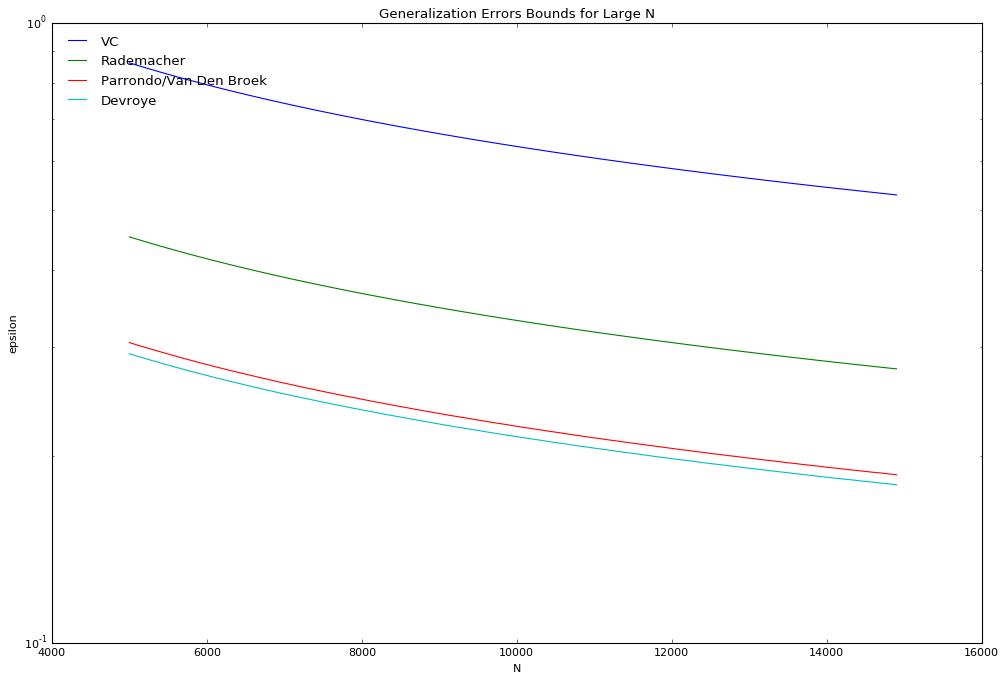

In [4]:
def vc_mapper(N):
    return vc_eps(0.05, N, 50)

vc_vec = np.vectorize(vc_mapper)

def rademacher_eps(delta, N, dvc):
    cur_eps = math.sqrt((2.0/N)*(math.log(2.0*N)+(dvc*math.log(N)))) + math.sqrt((2.0/N) * math.log(1.0/delta)) + (1.0/N)
    return cur_eps

def rademacher_mapper(N):
    return rademacher_eps(0.05, N, 50)

rademacher_vec = np.vectorize(rademacher_mapper)

eps_range = np.arange(0.0,10, 0.0001)

def parrondo_eps(delta, N, dvc):
    last_true = False
    last_eps = eps_range[0]
    for cur_eps in eps_range:
        cur_rightside = (1.0/N) * ((2.0*cur_eps) + math.log(6.0/delta) + (dvc*math.log(2.0*N)))
        cur_rightside = math.sqrt(cur_rightside)
        cur_true = cur_eps <= cur_rightside
        if cur_true == False and last_true == True:
            break
        elif cur_true == True:
            last_true = True
            last_eps = cur_eps
    return last_eps

def parrondo_mapper(N):
    return parrondo_eps(0.05, N, 50)

parrondo_vec = np.vectorize(parrondo_mapper)

def devroye_eps(delta, N, dvc):
    last_true = False
    last_eps = eps_range[0]
    for cur_eps in eps_range:
        cur_rightside = (1.0/(2.0*N))*(((4.0*cur_eps)*(1.0+cur_eps)) + math.log(4.0/delta) + ((2.0*dvc)*math.log(N)))
        cur_rightside = math.sqrt(cur_rightside)
        cur_true = cur_eps <= cur_rightside
        if cur_true == False and last_true == True:
            break
        elif cur_true == True:
            last_true = True
            last_eps = cur_eps
    return last_eps

def devroye_mapper(N):
    return devroye_eps(0.05, N, 50)

devroye_vec = np.vectorize(devroye_mapper)

prob2 = {}
prob2["N"] = np.arange(5000,15000, 100)
prob2["vc"] = vc_vec(prob2["N"])
prob2["rad"] = rademacher_vec(prob2["N"])
prob2["par"] = parrondo_vec(prob2["N"])
prob2["dev"] = devroye_vec(prob2["N"])

prob2["plot"] = plt.figure(figsize=(15,10), dpi=80)
prob2["ax"] = prob2["plot"].add_subplot(111)
prob2["ax"].set_title("Generalization Errors Bounds for Large N")
prob2["ax"].set_xlabel("N")
prob2["ax"].set_ylabel("epsilon")
prob2["ax"].set_yscale("log", basey=10)


prob2["ax"].plot(prob2["N"], prob2["vc"], label="VC")
prob2["ax"].plot(prob2["N"], prob2["rad"], label="Rademacher")
prob2["ax"].plot(prob2["N"], prob2["par"], label="Parrondo/Van Den Broek")
prob2["ax"].plot(prob2["N"], prob2["dev"], label = "Devroye")

prob2["ax"].legend(loc='upper left', frameon=False)

plt.show()

From the following plot, we can see that the Parrondo/Van den Broek bound yields the lowest bounds for small N.

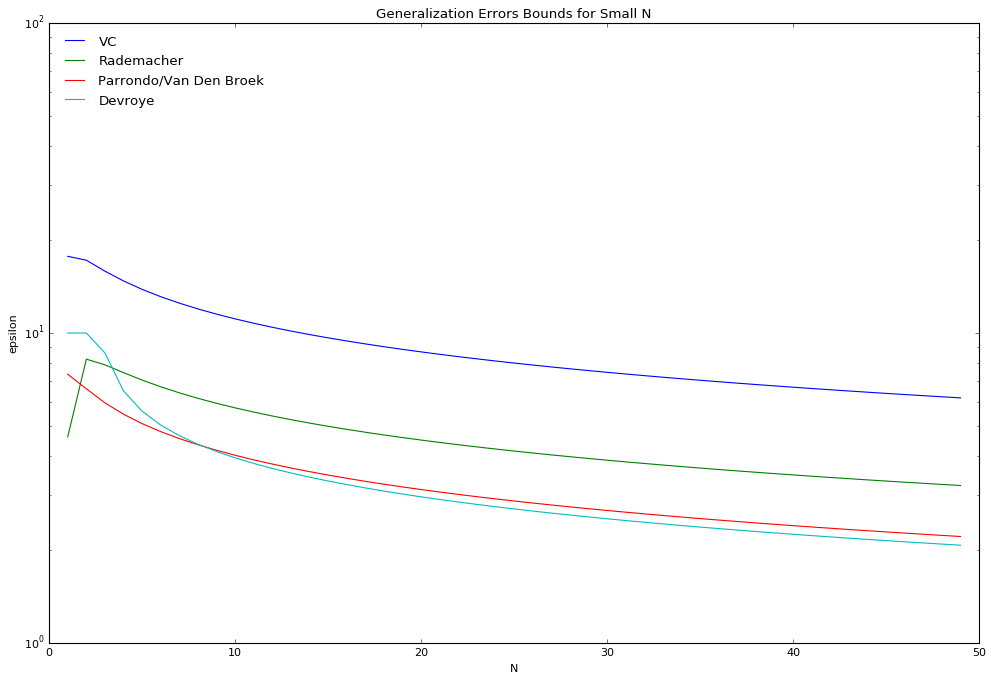

In [5]:
prob3 = {}
prob3["N"] = np.arange(1,50, 1)
prob3["vc"] = vc_vec(prob3["N"])
prob3["rad"] = rademacher_vec(prob3["N"])
prob3["par"] = parrondo_vec(prob3["N"])
prob3["dev"] = devroye_vec(prob3["N"])

prob3["plot"] = plt.figure(figsize=(15,10), dpi=80)
prob3["ax"] = prob3["plot"].add_subplot(111)
prob3["ax"].set_title("Generalization Errors Bounds for Small N")
prob3["ax"].set_xlabel("N")
prob3["ax"].set_ylabel("epsilon")
prob3["ax"].set_yscale("log", basey=10)


prob3["ax"].plot(prob3["N"], prob3["vc"], label="VC")
prob3["ax"].plot(prob3["N"], prob3["rad"], label="Rademacher")
prob3["ax"].plot(prob3["N"], prob3["par"], label="Parrondo/Van Den Broek")
prob3["ax"].plot(prob3["N"], prob3["dev"], label = "Devroye")

prob3["ax"].legend(loc='upper left', frameon=False)

plt.show()

## BIAS AND VARIANCE

Given target function f : [-1, 1] &rarr; &reals; given by f(x) = sin(&pi;x) with input probability distribution uniform on [-1,1], training set with 2 examples &isin; [-1, 1] picked independently, hypothesis picked by learning algorithm that minimizes the squared error.


**Given :** hypothesis h(x) = ax.

**Want :** Expected value of h(x) (g-bar(x)), bias, variance.
- Note that g-bar(x) &approx; (1/K) * &sum; (k=1; K) g<sup>&Dscr;<sub>K</sub></sup>(x)


**Idea :** Use linear regression w = X<sup>&#10013;</sup>y for learning algorithm, where X and y are 2 x 1 matrices.

In [49]:
#number of x value pairs (2 training examples per set)
bv_numpairs = 10000

bv_hyp = lambda x: math.sin(math.pi * x)
bv_hyp_vec = np.vectorize(bv_hyp)

#generate a bunch of 2 elt data sets (transposed) in one fell swoop
bv_xpairs = np.random.uniform(-1,1,(bv_numpairs,1,2))
bv_labels = bv_hyp_vec(bv_xpairs) #get their labels

bv_a_vals = np.array([]) #a values for h(x) = ax
bv_a_var = np.array([])
#do training for each 2 elt data set
for i in range(bv_numpairs):
    cur_data = bv_xpairs[i].T
    cur_data_pinv = np.linalg.pinv(cur_data)
    cur_labels = bv_labels[i].T
    cur_a = np.dot(cur_data_pinv, cur_labels)
    bv_a_vals = np.concatenate((bv_a_vals,cur_a[0]),0)

#average out
bv_a_avg = np.average(bv_a_vals)

#find the bias
bv_xaxis = np.arange(-1,1,0.001) #dividing up the [-1,1] interval in chunks
bv_yaxis = bv_hyp_vec(bv_xaxis) #finding their corresponding sin vals
bv_gbaxis = np.multiply(bv_a_avg,bv_xaxis) #finding where they fall on g-bar(x)=(a_avg)*x
bv_bias = np.average(np.square(np.subtract(bv_gbaxis,bv_yaxis))) #finding (1/N)*sum(g-bar(x)-sin(pi*x))^2

#find the variance
#for each data set, need to find expected value E(dataset)[(g(dataset,x)-g-bar(x))^2]
bv_var = np.array([])
for i in range(bv_numpairs):
    #for current data set, find g(x)
    cur_gx = np.multiply(bv_a_vals[i], bv_xpairs[i])
    #subtract and square from corresponding gbar
    cur_gbx = np.multiply(bv_a_avg, bv_xpairs[i])
    cur_gdiff = np.square(np.subtract(cur_gx, cur_gbx))
    #for expected value, find average
    cur_var = np.average(cur_gdiff)
    bv_var = np.concatenate((bv_var,[cur_var]))
    
#now find average variance
bv_var_avg = np.average(bv_var)


 
print("The average hypothesis of form g_bar(x) = ax is given by a = %f" % bv_a_avg)
print("The average bias is %f" % bv_bias)
print("The average variance is %f" % bv_var_avg)

The average hypothesis of form g_bar(x) = ax is given by a = 1.425217
The average bias is 0.269761
The average variance is 0.205021


Now we want to find the least out-of-sample expected errors from multiple hypotheses (including the one we just did). The hypotheses include:
1. h(x) = b
2. h(x) = ax
3. h(x) = ax + b
4. h(x) = ax<sup>2</sup>
5. h(x) = ax<sup>2</sup> + b


The process for training can go much the same as before, modeling our process over the linear regression example, choosing our weights to represent the unknowns a and b, and squaring the variable x when necessary.
